In [1]:
from pycaret.datasets import get_data
dataset = get_data('possum')

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [2]:
dataset.shape

(104, 14)

In [3]:
data = dataset.sample(frac=0.9, random_state=121)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (94, 14)
Unseen Data For Predictions: (10, 14)


In [4]:
from pycaret.regression import *
exp_reg101 = setup(data = data, target = 'footlgth', session_id=123, silent = True) 

,Description,Value
0,session_id,123
1,Target,footlgth
2,Original Data,"(94, 14)"
3,Missing Values,1
4,Numeric Features,9
5,Categorical Features,4
6,Ordinal Features,0
7,High Cardinality Features,0
8,High Cardinality Method,None
9,Transformed Train Set,"(65, 28)"


In [5]:
best = compare_models(exclude = ['ransac'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1.7825,4.7281,2.1205,0.7145,0.0307,0.0261,0.1820
ridge,Ridge Regression,1.8876,5.3136,2.2365,0.6939,0.0320,0.0274,0.0070
knn,K Neighbors Regressor,1.8791,5.2717,2.1936,0.6766,0.0312,0.0271,0.0180
br,Bayesian Ridge,1.9736,5.6317,2.2865,0.6713,0.0328,0.0287,0.0150
en,Elastic Net,1.9631,5.6650,2.2902,0.6700,0.0329,0.0286,0.0090
lasso,Lasso Regression,2.0013,5.8979,2.3223,0.6621,0.0334,0.0292,0.2870
rf,Random Forest Regressor,1.8638,5.5930,2.2848,0.6595,0.0329,0.0272,0.3020
ada,AdaBoost Regressor,1.9863,5.8773,2.3456,0.6564,0.0338,0.0291,0.0920
lr,Linear Regression,1.9966,6.0554,2.3735,0.6497,0.0341,0.0291,0.4490
lightgbm,Light Gradient Boosting Machine,1.9095,6.1972,2.3854,0.6406,0.0344,0.0279,0.0320


In [6]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [7]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.0921,7.2106,2.6853,0.2373,0.0390,0.0304
1,0.7630,1.0165,1.0082,0.9497,0.0136,0.0106
2,2.0496,5.9462,2.4385,0.6987,0.0343,0.0298
3,1.7144,4.1102,2.0274,0.6671,0.0284,0.0248
4,1.3374,2.7270,1.6514,0.7936,0.0246,0.0203
5,1.6238,4.1618,2.0401,0.8713,0.0303,0.0243
6,1.6170,3.8017,1.9498,0.7899,0.0280,0.0235
7,2.2538,6.8230,2.6121,0.7777,0.0385,0.0335
8,2.0657,5.6517,2.3773,0.5830,0.0344,0.0296


In [8]:
print(et)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=123, verbose=0, warm_start=False)


In [9]:
ridge = create_model('ridge')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.0764,5.9562,2.4405,0.3700,0.0352,0.0299
1,1.4244,2.8768,1.6961,0.8576,0.0233,0.0201
2,1.6096,2.8443,1.6865,0.8559,0.0246,0.0240
3,1.6413,3.1370,1.7712,0.7459,0.0251,0.0236
4,1.5763,4.2739,2.0673,0.6766,0.0290,0.0233
5,2.2037,6.5990,2.5688,0.7959,0.0378,0.0328
6,1.4081,3.6640,1.9142,0.7975,0.0267,0.0201
7,2.5588,11.4675,3.3864,0.6265,0.0483,0.0373
8,2.7176,8.8773,2.9795,0.3450,0.0432,0.0388


In [10]:
knn = create_model('knn')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.2829,7.2219,2.6874,0.2361,0.0388,0.0330
1,0.9486,1.8866,1.3735,0.9066,0.0183,0.0130
2,2.6143,8.7300,2.9547,0.5576,0.0414,0.0380
3,1.6600,3.3336,1.8258,0.7300,0.0257,0.0240
4,1.7257,4.3463,2.0848,0.6711,0.0308,0.0260
5,1.3667,2.2852,1.5117,0.9293,0.0214,0.0197
6,1.0733,1.6381,1.2799,0.9095,0.0183,0.0155
7,2.4733,9.6403,3.1049,0.6860,0.0433,0.0345
8,2.7900,9.5216,3.0857,0.2974,0.0445,0.0398


In [11]:
tuned_et = tune_model(et)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.9208,6.2224,2.4945,0.3418,0.0363,0.0279
1,0.9204,1.3203,1.1490,0.9346,0.0155,0.0128
2,1.8808,4.7805,2.1864,0.7577,0.0304,0.0272
3,1.3281,2.3130,1.5209,0.8127,0.0216,0.0193
4,1.5278,2.9380,1.7141,0.7777,0.0253,0.0230
5,1.6286,5.5196,2.3494,0.8293,0.0352,0.0250
6,1.0397,2.0626,1.4362,0.8860,0.0201,0.0150
7,2.5763,7.9879,2.8263,0.7398,0.0404,0.0372
8,2.3669,7.0664,2.6583,0.4786,0.0376,0.0335


In [12]:
print(tuned_et)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=8, max_features='sqrt', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0001,
                    min_impurity_split=None, min_samples_leaf=2,
                    min_samples_split=5, min_weight_fraction_leaf=0.0,
                    n_estimators=240, n_jobs=-1, oob_score=False,
                    random_state=123, verbose=0, warm_start=False)


In [13]:
import numpy as np
lgbm_params = {'num_leaves': np.arange(10,200,10),
                        'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
                        'learning_rate': np.arange(0.1,1,0.1)
                        }

In [14]:
tuned_ridge = tune_model(ridge)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.0460,6.7645,2.6009,0.2845,0.0374,0.0293
1,1.1268,1.9400,1.3928,0.9040,0.0188,0.0157
2,1.5041,2.7870,1.6694,0.8588,0.0243,0.0223
3,1.5218,3.0446,1.7449,0.7534,0.0240,0.0217
4,1.9723,5.6896,2.3853,0.5694,0.0342,0.0294
5,2.3621,7.4215,2.7242,0.7705,0.0403,0.0355
6,1.3771,2.6909,1.6404,0.8513,0.0229,0.0198
7,2.5286,9.5583,3.0917,0.6886,0.0436,0.0363
8,2.9598,9.5041,3.0829,0.2987,0.0441,0.0422


In [15]:
print(tuned_ridge)

Ridge(alpha=7.73, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=123, solver='auto', tol=0.001)


In [16]:
tuned_knn = tune_model(knn)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.0429,6.7425,2.5966,0.2868,0.0374,0.0293
1,1.0500,1.8230,1.3502,0.9098,0.0183,0.0147
2,2.5393,8.4422,2.9056,0.5722,0.0408,0.0369
3,1.6929,4.1011,2.0251,0.6678,0.0286,0.0246
4,1.6536,4.2271,2.0560,0.6801,0.0301,0.0247
5,0.9500,1.7402,1.3192,0.9462,0.0181,0.0133
6,1.0500,1.5035,1.2262,0.9169,0.0173,0.0151
7,2.3000,8.3058,2.8820,0.7294,0.0401,0.0321
8,2.7917,9.2373,3.0393,0.3184,0.0435,0.0397


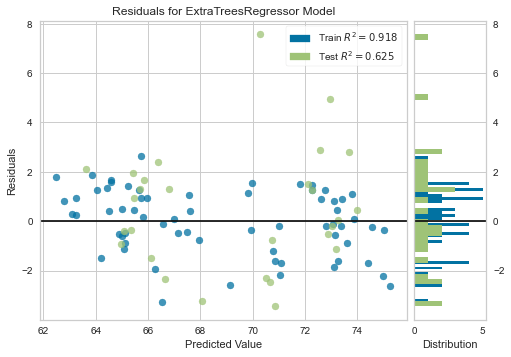

In [17]:
plot_model(tuned_et)

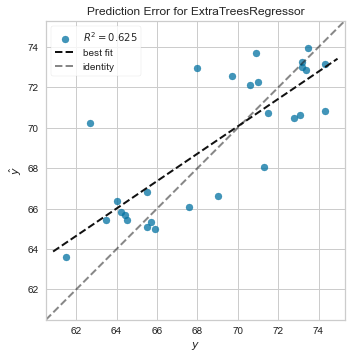

In [18]:
plot_model(tuned_et, plot = 'error')

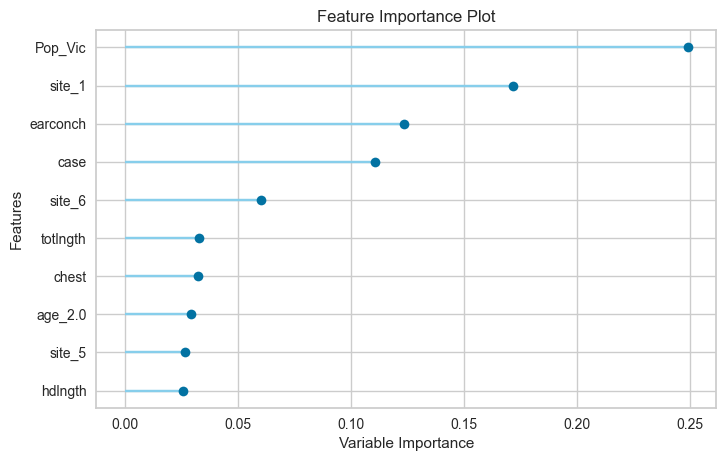

In [19]:
plot_model(tuned_et, plot='feature')

In [20]:
evaluate_model(tuned_et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [21]:
predict_model(tuned_et);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,1.8818,5.9813,2.4457,0.6247,0.0353,0.0278


In [22]:
final_et = finalize_model(tuned_et)

In [23]:
print(final_et)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=8, max_features='sqrt', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0001,
                    min_impurity_split=None, min_samples_leaf=2,
                    min_samples_split=5, min_weight_fraction_leaf=0.0,
                    n_estimators=240, n_jobs=-1, oob_score=False,
                    random_state=123, verbose=0, warm_start=False)


In [24]:
predict_model(final_et);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,1.2024,2.6337,1.6229,0.8348,0.0236,0.0177


In [25]:
unseen_predictions = predict_model(final_et, data=data_unseen)
unseen_predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,1.3968,2.5973,1.6116,0.7975,0.0248,0.0217


,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,Label
0,9,1,Vic,f,9.0,93.4,56.3,91.5,37.0,72.4,52.9,15.5,28.0,33.0,73.397642
1,35,2,Vic,m,4.0,94.4,57.9,85.0,35.5,71.2,55.5,16.4,28.0,35.5,71.808760
2,47,3,other,m,2.0,90.1,54.8,89.0,37.5,66.0,45.5,15.0,25.0,33.0,67.194507
3,53,3,other,f,3.0,93.1,58.1,91.0,38.0,67.4,46.0,16.5,26.0,33.5,65.716942
4,66,5,other,f,3.0,90.4,55.8,86.0,36.5,63.2,44.2,15.7,26.5,34.0,64.924918


In [26]:
from pycaret.utils import check_metric
check_metric(unseen_predictions.footlgth, unseen_predictions.Label, 'R2')

0.7975

In [27]:
save_model(final_et,'Final ET Model 25Nov2020')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='footlgth',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strate...
                  ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                      criterion='mse', max_depth=8,
                                      max_features='sqrt', max_leaf_nodes=None,
                                      max_samples=None,
                                      m

In [28]:
saved_final_et = load_model('Final ET Model 25Nov2020')

Transformation Pipeline and Model Successfully Loaded


In [29]:
new_prediction = predict_model(saved_final_et, data=data_unseen)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,1.3968,2.5973,1.6116,0.7975,0.0248,0.0217


In [30]:
new_prediction.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,Label
0,9,1,Vic,f,9.0,93.4,56.3,91.5,37.0,72.4,52.9,15.5,28.0,33.0,73.397642
1,35,2,Vic,m,4.0,94.4,57.9,85.0,35.5,71.2,55.5,16.4,28.0,35.5,71.808760
2,47,3,other,m,2.0,90.1,54.8,89.0,37.5,66.0,45.5,15.0,25.0,33.0,67.194507
3,53,3,other,f,3.0,93.1,58.1,91.0,38.0,67.4,46.0,16.5,26.0,33.5,65.716942
4,66,5,other,f,3.0,90.4,55.8,86.0,36.5,63.2,44.2,15.7,26.5,34.0,64.924918


In [31]:
from pycaret.utils import check_metric
check_metric(new_prediction.footlgth, new_prediction.Label, 'R2')

0.7975